
# Investigating Surface Heat Fluxes in the Coastal Ocean 
<img src="oceanline.png"/>

## Lesson Objectives 
During this lab, you will learn how to

- Interpret relationships between oceanic and atmospheric data
- Plot sea surface temperature and heat fluxes
- Assess the importance of the surface heat fluxes in an ocean temperature budget
- Understand the impact of different environmental conditions in bulk heat flux formulas

<img src="line.png"/>

## Background

### Defining heat flux

Heat flux is the flow of energy through a surface over a period of time.  Ocean surface heat flux is a critical component of Earth’s climate system.  The impact of global warming due to anthropogenic pollution has had a disproportionately large effect on the world’s oceans; it has been estimated that ~90% of the warming has been absorbed by the oceans. Nearly all oceanic heating is driven by air-sea interaction where incoming solar energy warms the upper ocean and outgoing heat loss cools it.  The primary processes that lead to heat **loss** through the ocean surface are long-wave radiation (or ‘back radiation’), latent heat flux, and sensible heat flux.

Anything that has a temperature emits electromagnetic radiation.  High temperature sources like the sun emit shortwave radiation, while cooler temperature sources like the ocean give off **long-wave radiation**.  When long-wave radiation is emitted from the ocean, it releases heat.  

**Latent heat flux** is an energy exchange that occurs between the ocean and atmosphere when water changes state.  Water evaporates from the ocean surface becoming water vapor in the atmosphere.  This can be thought of as the ocean ‘sweating’.  Humans sweat to cool down (i.e., water evaporates off our skin removing heat from our body) and so does the ocean. As water changes from liquid to vapor, a tremendous amount of energy is released across the air-sea interface. 

**Sensible heat flux** is heat exchange by conduction.  When two objects with different temperatures are put in contact with each other, heat flows from the hotter object to the colder one. Since the water is typically warmer than the ambient air, heat energy is transferred from the ocean to the atmosphere.

<img src="fluxes.png"/>

*Fig.1 Composite of images including Heat fluxes:National Oceanography Centre (https://noc.ac.uk/science/sustained-observations/noc-surface-flux-dataset), Conduction: hand holding pot from sciencenotes.org(https://sciencenotes.org/heat-transfer-conduction-convection-radiation), and Blackbody Radiation by Darth Kule - Own work, Public Domain (https://commons.wikimedia.org/w/index.php?curid=10555337)*

### Bulk formula for total heat flux

Taking direct measurements of heat fluxes in the ocean can be very challenging. Imagine attempting to take careful measurements of evaporated seawater while being rocked around by winds, storms, and waves!  Scientists have addressed this hurdle by developing algorithms, called **bulk formulas**, to serve as proxies in lieu of direct measurements.  A bulk formula roughly captures the intended processes based on environmental properties that are much easier to measure, such as temperature, wind speed, and humidity.  There is a wealth of data, collected from many platforms in and around the ocean, that can provide the necessary elements for calculating heat fluxes. 

**Heat fluxes between the ocean and the atmosphere** can be estimated by the bulk formula

<center> $Q_t$ = $Q_{in}$ + $Q_b$ + $Q_h$ + $Q_e$ 
</center> 
where

| Term | Definition |
| :-: | :-: |
| $Q_t$ | Total Flux |
| $Q_{in}$ | Incoming Solar Radiation |
| $Q_b$ | Long-wave Back Radiation  |
| $Q_h$ | Sensible Heat Flux |
| $Q_e$ | Latent Heat Flux, ($e$ for evaporation) |


In this lab, we will use the bulk formula to estimate heat fluxes using data from Orange Beach, AL.

---
## Interpreting Surface Temperature Data

### Time series measurements taken from the Orange Beach buoy

The data used in this lab was collected by a NOAA buoy in the Gulf of Mexico that is just offshore of Orange Beach, AL. The data can be viewed in real-time at the NOAA National Buoy Data Center (NBDC): https://www.ndbc.noaa.gov/station_page.php?station=42012(Fig. 1). The instrumentation on this buoy collects a range of meteorological parameters including those needed for calculating the latent and sensible heat fluxes. The buoy collects data at 2 meters below the surface, which is approximated as the surface of the water column. The depth of the water column at this location is 26 meters.

Incoming solar radiation and outgoing long-wave radiation are a bit more difficult to determine and the values are generally taken from a ‘reanalysis dataset’.  Reanalysis datasets are created by combining observations with numerical modeling outputs.  This lab uses data from the North American Regional Reanalysis (NARR) from National Center for Environmental Prediction (NCEP) (https://psl.noaa.gov/data/gridded/data.narr.html). The buoy data and the NARR reanalysis data can be used to understand aspects of the complex relationship between water temperature and air-sea interactions. 

<img src="buoy.png"/>

*Fig. 2 ESRI map, photo of and photos taken from NOAA Buoy #42012 Orange Beach – 44 nm southeast of Mobile, AL. Image courtesy of NOAA.*

### Preparing the data

Before using Python to load the file, take a look at the contents:  
- Which variables does the file contain and what are the associated units?
- When did data collection begin?  When did it end?
- How often were the measurements made?  (What is the time difference between measurements?)

### Load the Python libraries and functions

Run the next cell to import all libraries and import all functions that will be used during the lab.  

The functions are in a file called `heatfluxlab.py`, located in the same directory as this notebook. The functions are also cut and pasted in the last cell of the notebook, so you can easily look at or modify them.

In [ ]:
#Import functions for the lab
from heatfluxlab import *

**Load the data file**

Read in the file and check that it has been loaded correctly.

In [23]:
#Name of the file
filename = "orb_buoy_2017.txt"
#Load the data
df = readfile(filename)
#Check the contents
checkdata(df)

,Year(YYYY),Month(MM),Day(DDD),Hour(HH),Minute(mm),Water_Temp(oC),Air_Temp(oC),Relative_Humidity(%),Atm_Pressure(mb),Wind_Speed(m/s),Solar_radiation(W/m^2),Back_Radiation(W/m^2),Sensible_Heat_Flux(W/m^2),Latent_Heat_Flux(W/m^2)
0,2017,8,20,0,50,30.7,28.3,80.393,1015.0,2.9409,1.1285,-54.229,-12.070,-100.54
1,2017,8,20,1,50,30.9,28.5,75.286,1014.9,4.1391,2.4826,-53.229,-16.383,-158.77
2,2017,8,20,2,50,30.8,28.6,67.524,1014.7,5.2283,3.8368,-52.229,-18.961,-235.49
3,2017,8,20,3,50,30.9,28.5,73.937,1015.1,4.5748,97.2740,-47.288,-18.075,-181.03
4,2017,8,20,4,50,30.9,28.4,75.725,1015.3,4.3569,209.1300,-41.559,-17.997,-167.09


**Rename the columns and create a timestamp**

Change the variable names so they are easier to work with, and rename the date components to be compatible with a Python function that creates a timestamp.

For dates, the names must be in the following format.
- year
- month
- day
- hour
- minute
- second

It is not necessary to have each of those time elements; just use the values contained in the dataset.

In [24]:
#Give names for each column
names = ['year','month','day','hour','minute','sst','Ta','RH','atm','Vm','Qin','Qb','Qh','Qe']
#Rename the columns
renamecols(df,names)
#Check the data again
checkdata(df)

,year,month,day,hour,minute,sst,Ta,RH,atm,Vm,Qin,Qb,Qh,Qe
0,2017,8,20,0,50,30.7,28.3,80.393,1015.0,2.9409,1.1285,-54.229,-12.070,-100.54
1,2017,8,20,1,50,30.9,28.5,75.286,1014.9,4.1391,2.4826,-53.229,-16.383,-158.77
2,2017,8,20,2,50,30.8,28.6,67.524,1014.7,5.2283,3.8368,-52.229,-18.961,-235.49
3,2017,8,20,3,50,30.9,28.5,73.937,1015.1,4.5748,97.2740,-47.288,-18.075,-181.03
4,2017,8,20,4,50,30.9,28.4,75.725,1015.3,4.3569,209.1300,-41.559,-17.997,-167.09


Define a variable containing a timestamp.  Pass all time variables in the dataset to the function.  Check the new time variable, and show how many days of measurements are in the dataset.

In [25]:
#Make a list of all time variables
timevars = ['year','month','day','hour','minute']
#Create the time variable
Time = maketimestamp(df, timevars)
#Check the Time variable
checkdata(Time)
#Check what time period is covered in the dataset.
timerange = checktimerange(Time)
print("Data is available for",timerange)

Data is available for 60 days 23:00:00


### Plot a time series of sea surface temperature

The sea surface temperature (SST) at the Orange Beach buoy is recorded as 'water temperature'. To examine the SST, do the following:
- Define a variable `sst` that contains the sea surface temperature. 
- Define a variable `Time` by converting the date components into one datetime object.
- Create a plot showing `sst` vs `time`.

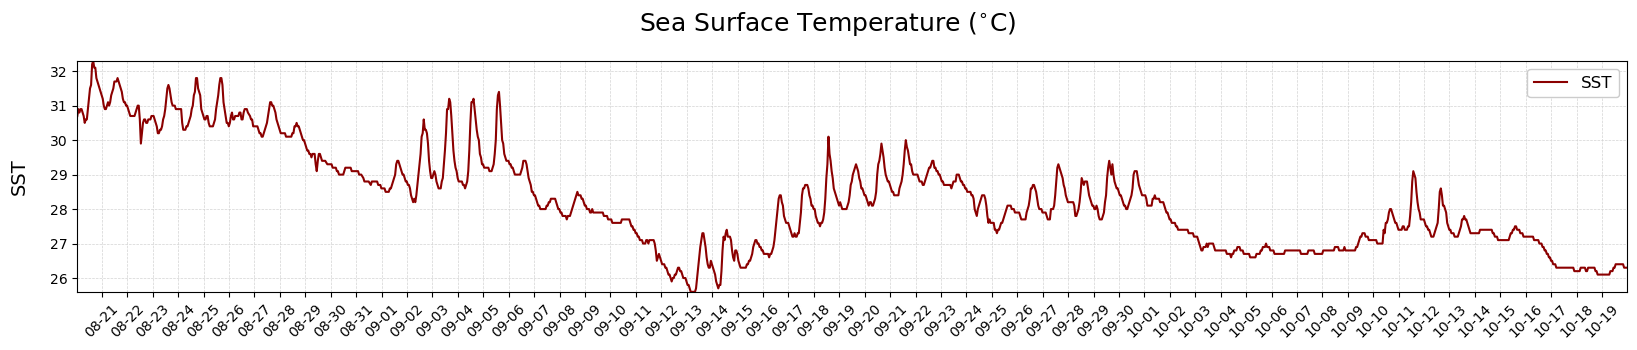

In [26]:
#Make a timeseries plot of SST
single_plot(Time,df['sst'],'Sea Surface Temperature ($^{\circ}$C)', 'Time', 'SST', 'darkred')

### Discussion questions

Use the plot of SST to answer the following:

1. What is the temperature range over the time period?
2. Locate major periods of decreasing temperature. Approximately which day did each period begin?
3. What might have caused these cooling periods?
4. Did any hurricanes pass through the Gulf of Mexico during this time period? Do any look coincident with changes in the temperature structure?

In [27]:
#### 1. What is the temperature range over the time period?

#### 2. Locate major periods of decreasing temperature. Approximately which day did each period begin?

#### 3. What might have caused these cooling periods?

#### 4. Did any hurricanes pass through the Gulf of Mexico during this time period? Do any look coincident with changes in the temperature structure?


---
## Finding Patterns in Heat Flux data

Recall that heat flux is the flow of energy through a surface over a period of time.  The total heat flux is the summation of all components representing heat loss or heat gain.  Incoming solar radiation acts as a **heat gain** term, while long-wave radiation (or ‘back radiation’), latent heat flux, and sensible heat flux act as **heat loss** terms.

### Incoming solar radiation
Incoming solar radiation ($Q{in}$), our first heat flux term, causes the ocean to **gain** heat.  To examine the heat flux term $Q{in}$, do the following:
- Define a variable `Qin` that contains the incoming solar radiation. 
- Create a plot showing `Qin` vs `time`.

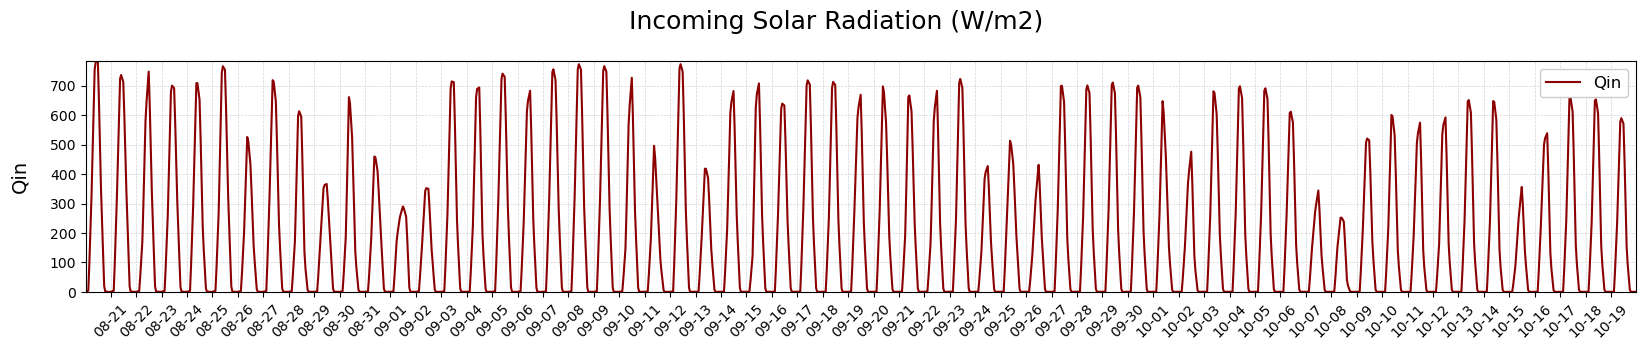

In [28]:
#Make a timeseries plot of Qin
single_plot(Time,df['Qin'],'Incoming Solar Radiation (W/m2)', 'Time', 'Qin', 'darkred')

### Back radiation, sensible heat flux, and latent heat flux

Back radiation ($Q_b$), sensible heat flux ($Q_h$), latent heat flux ($Q_e$) generally cause the ocean to **lose** heat.

To examine all heat flux terms along with the sea surface temperature, use the function  `plotfluxtemp(Time,df,where,when)`, where:
- `Time` is a datetime object holding the timestamp calculated earlier with `maketimestamp`.
- `df` is a dataframe that must contain fluxes and temperature with expected column names of `Qin`, `Qb`, `Qh`, `Qe`, and `sst`
- `where` is a string containing a plain language summary of whereabouts the data was taken.
- `when` is a string containing a plain language summary of approximately during which the data was taken.

We will define `where = "Mobile, Alabama"` and `when = "peak of hurricane season in 2017"`.  Calling the function will result in a plot with three figures:  heat gain, heat loss, and sea surface temperature.  The bottom title will read "Data was gathered near Mobile, Alabama during peak of hurricane season in 2017." 

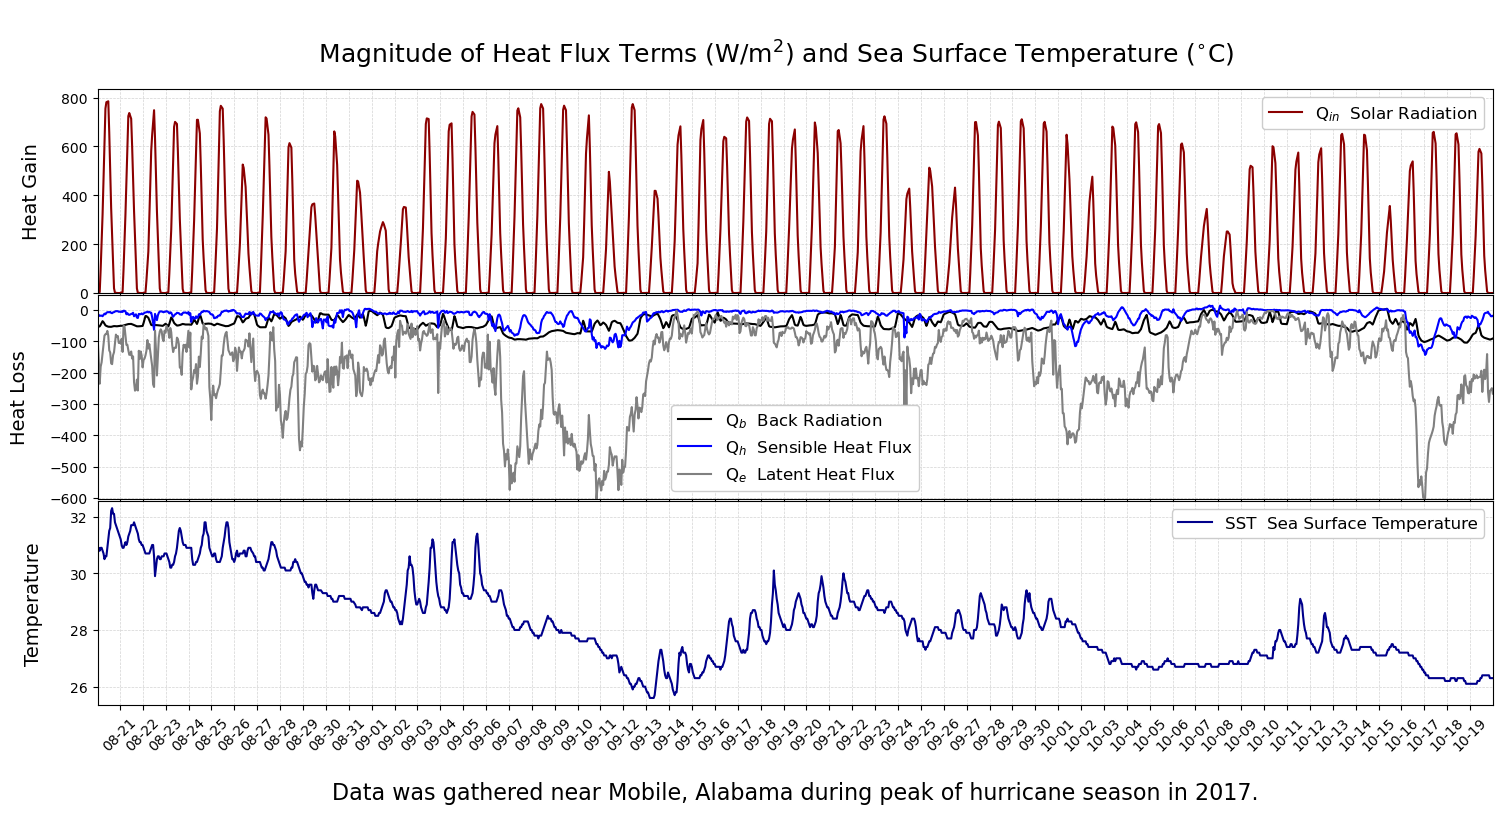

In [29]:
#Describe where the data was taken and when
where = "Mobile, Alabama"
when = "peak of hurricane season in 2017"

#Plots Solar Radiation, Heat Fluxes, and Sea Surface Temperature
#Note, the variables must all exist in df, and must be named as expected
#Define where the data was taken and when
plotfluxtemp(Time,df,where,when)

### Discussion questions
Use the plots of the heat flux terms to answer the following:
1. What is the range of values for the incoming solar radiation ($Q_{in}$) and what is the dominant pattern in this time series?
2. What is causing this pattern?
3. Why is there variability in the peaks?
4. Note that there is a subtle long-term trend over the two month period, with a ~100 W/m$^{2}$ decline in the peaks. Why is this happening? *Hint think about how the time series goes from August to October
5. How do the loss terms differ from the gain term? Please include differences in direction (positive or negative), magnitude, and patterns.
6. Qualitatively, what is the strongest heat loss term?
7. Compare the latent heat flux ($Q_e$) with the SST plot. Are there any relationships that you see? Is this what you would expect?

In [30]:
#### 1. What is the range of values for the incoming solar radiation ($Q_{in}$) and what is the dominant pattern in this time series?

#### 2. What is causing this pattern?

#### 3. Why is there variability in the peaks?

#### 4. Note that there is a subtle long-term trend over the two month period, with a ~100 W/m$^{2}$ decline in the peaks. Why is this happening? *Hint think about how the time series goes from August to October

#### 5. How do the loss terms differ from the gain term? Please include differences in direction (positive or negative), magnitude, and patterns.

#### 6. Qualitatively, what is the strongest heat loss term?

#### 7. Compare the latent heat flux ($Q_e$) with the SST plot. Are there any relationships that you see? Is this what you would expect?

---
## Determine Relative Importance of Terms in a Heat Budget

We have gained a qualititive sense of the relative strengths of heat flux terms using the plots for visual comparison. We can quantify the relative strengths by calculating the average value for each term over the period of time.

Define a new variable `Qloss` that contains the total heat loss at every point in time.
Define a new variable `Qt` that contains the total heat flux at every point in time.

Calculate the average of $Q_{in}$, $Q_b$, $Q_h$, $Q_e$ rounded to the nearest integer: 
- To calculate the mean average of all values in the column of a dataframe, do `df['column_name'].mean()`.
- To round a value to the nearest integer, use `round(value)`.

then sum the terms to calculate:
- Total average heat gain, `mean_gain`
- Total average heat loss, `mean_loss`
- Total average heat flux, `mean_total`

In [31]:
#Average of individual heat flux terms
Qloss = df['Qb']+df['Qh']+df['Qe']
Qt = Qloss + df['Qin']

#Average of individual heat flux terms
Qin_mean = df['Qin'].mean()
Qb_mean = df['Qb'].mean()
Qh_mean = df['Qh'].mean()
Qe_mean = df['Qe'].mean()

#Total averages of gain or loss terms
mean_gain = Qin_mean
mean_loss = Qb_mean+Qh_mean+Qe_mean
mean_total = mean_gain + mean_loss

#Print a summary of the results
print("Heat Gain:")
print("    Total average heat gain was",round(mean_gain,1),"W/m2\n")

print("Heat Loss:")
print("    Average heat loss terms are Back Radiation:",round(Qb_mean,1),"W/m2, Sensible Heat:",
      round(Qh_mean,1),"W/m2, Latent Heat:",round(Qe_mean,1),"W/m2")
print("    Total average heat loss was",round(mean_loss,1),"W/m2\n")

print("Total:")
print("    Total average heat flux is",round(mean_total,1),"W/m2\n")

Heat Gain:
    Total average heat gain was 203.1 W/m2

Heat Loss:
    Average heat loss terms are Back Radiation: -44.6 W/m2, Sensible Heat: -18.7 W/m2, Latent Heat: -168.7 W/m2
    Total average heat loss was -231.9 W/m2

Total:
    Total average heat flux is -28.8 W/m2



### Discussion questions
1. What is the relative strength of each of the heat flux terms?
2. Based on these mean values would you expect the water column to be gaining or losing heat?  Explain.
3. Are your findings consistent with the water temperature data? 

In [32]:
#### 1. What is the relative strength of each of the heat flux terms?

#### 2. Based on these mean values would you expect the water column to be gaining or losing heat?  Explain.

#### 3. Are your findings consistent with the water temperature data? 

---
## Determine the Expected Temperature Change from Surface Heat Fluxes

When an object changes temperature, it will transfer heat. The amount of heat depends on the mass of the object. Think about holding a mug of hot cocoa on a winter day. As your cocoa cools to match the surrounding air temperature, it releases heat which warms your hands.  Now think about sitting next to an outdoor hottub on that same winter day.  The cocoa and the hottub may start at the same temperatures, but the amount of heat they each release is extremely different.   

The heat gained or lost ($\Delta H$) by an object is proportional to it's mass and the temperature change 

<center> $\Delta H = c_s m \Delta T$ </center>

where

- $c_s$ = specific heat capacity in J/kg$^{\circ}$C
- $m$ = mass of the object in kg
- $\Delta T$ = temperature difference in $^{\circ}$C


The heat gained or lost over time is the heat flux

<center>$Q = \frac{\Delta H}{\Delta t}$</center>

which gives us an expression that relates heat flux to the change in temperature:

<center>$Q = c_s m \frac{\Delta T}{\Delta t}$</center>


**Are the changes in SST due *soley* to heat fluxes?**

We've calculated the heat gain or heat loss of the ocean based on the surface heat fluxes and examined a plot of the sea surface temperature. Are the changes in SST due *soley* to heat fluxes?

We can calculate the expected temperature change in the water column over the two month period using the expression above.  For liquids, mass is calculated by the density times the volume, and volume is the depth times the surface area.  If we assume that measurements taken at the Orange Beach buoy spanned a square meter of the water's surface, we arrive at the following *equation* for the total heat flux: 

<center>$Q = c_p \rho z \frac{\Delta T}{\Delta t}$</center>

where

- $c_p$ = heat capacity of seawater = 3850 J/m$^{2}$
- $\rho$ = average density of seawater = 1020 kg/m$^{2}$
- $z$ = water depth in meters
- $\Delta T$ = temperature difference in $^{\circ}$C
- $\Delta t$ = time difference in seconds

From this, we can derive the change in temperature given the heat flux:

<center>$\Delta T = \frac{Q  \Delta t}{c_p \rho z}$ </center>

Recall our bulk formula allowed us to *estimate* the total heat flux $Q$:

<center>  $Q \approx Q_t = Q_{in} + Q_b + Q_h + Q_e$</center> 

Using our calculated total heat flux $Q_t$, the time period of the measurements, and the depth of water at the Orange Beach buoy we can determine what the expected temperature change would be if surface fluxes were the only thing driving the temperature change.


<img src="heatfluxes.png"/>

**Calculate the change in temperature**


The equation for the change in temperature of a liquid given a total heat flux over one square meter of surface area is:
<center> $\Delta T = \frac{Q  \Delta t}{c_s \rho z}$ </center>

where:
- $\Delta t$ is the time difference in seconds
- $Q$ = heat flux in W/m2
- $c_s$ = specific heat capacity in J/kg$^{\circ}$C
- $\rho$ = density in kg/m3

To calculate this given heat flux measurements in seawater taken 26m below a buoy during a period of time, use the function `tempchange(Time, Qt, z, cs, rho)`.  Assume a heat capacity of 3850 J/kg$^{\circ}$C  with average density 1020 kg/m$^3$.

Recall that we have previously calculated:
- `Qt`, time series data with total flux in W/m2
and note:
- `Time`, series of timestamps

In [33]:
#Calculate the expected temperature change given the total heat flux estimated by the bulk formula
z = 26
cs = 3850
rho = 1020
tempchange(Time,Qt,z,cs,rho)

The expected change in temperature for the given heat flux for a water column depth of 26m is -1.49 degrees C


In [34]:
##To answer the Discussion Questions below, repeat this calculation for...
##Question 2, 5 meters
#tempchange()
##Question 3, 100 meters
#tempchange

### Discussion Questions
1. Based on the buoy data from Aug-Oct of 2017, is the change in temperature predicted from the surface heat flux consistent with what the water temperature data shows?  Why or why not? (Hint: Think about the water column structure at the end of summer as compared to winter.)
2. What would happen if the Orange Beach buoy was in 5m of water rather than 26m?
3. What would happen if the water column were 100 meters?
4. What do these differences in temperature change mean for how the coastal ocean cools?

In [35]:
#### 1. Based on the buoy data from Aug-Oct of 2017, is the change in temperature predicted from the surface heat flux consistent with what the water temperature data shows?  Why or why not? (Hint: Think about the water column structure at the end of summer as compared to winter.)

#### 2. What would happen if the Orange Beach buoy was in 5m of water rather than 26m?

#### 3. What would happen if the water column were 100 meters?

#### 4. What do these differences in temperature change mean for how the coastal ocean cools?

---
## Determine Environmental Conditions Driving Surface Heat Fluxes

Plots of temperature and heat flux illustrate that the decrease in temperature over the time period did not happen in a constant and linear fashion. Rather than a slow and steady decrease, there are lots of 'downs' and a few 'ups'. 
 
Let’s try to understand these shorter time fluctuations by looking at the most significant cooling events.  The latent heat flux $Q_e$ is the dominant source of heat loss during those time periods. Recall that $Q_e$ is an energy exchange that occurs between the ocean and atmosphere when water changes states, e.g., 'ocean sweating'.

We can examine each element contributing to the $Q_e$ term using a bulk formula for latent heat flux:

<center>$Q_e = \rho_a L_E C_L U_{10}(q_a-q_s)$ </center>

where 

- $\rho_a$ = density of air $\approx$ 1.2 kg/m3
- $L_e$ = latent heat of vaporization $\approx$ 2260 kJ/kg
- $C_L$ = bulk transfer coefficient, also called the Stanton number
- $U_{10}$ = wind speed at 10m
- $q_s$ = specific humidity at saturation
- $q_a$ = specific humidity of overlying air

Since wind speed and relative humidity are key terms in the formula, let’s take a look by plotting those terms.

Using the `single_plot (xvar, yvar, title, xlabel, ylabel, color)` function, plot the wind speed and relative humidity.  The function makes a single X vs Y plot, and the arguments are:
- `xvar` - The time variable
- `yvar` - Time dependent variable
- `title` - Main title shown over the plot
- `xlabel` - X-axis label, under the plot
- `ylabel` - Y-axis label, left of the plot, also used for the legend title
- `color` - Color of the plotted line

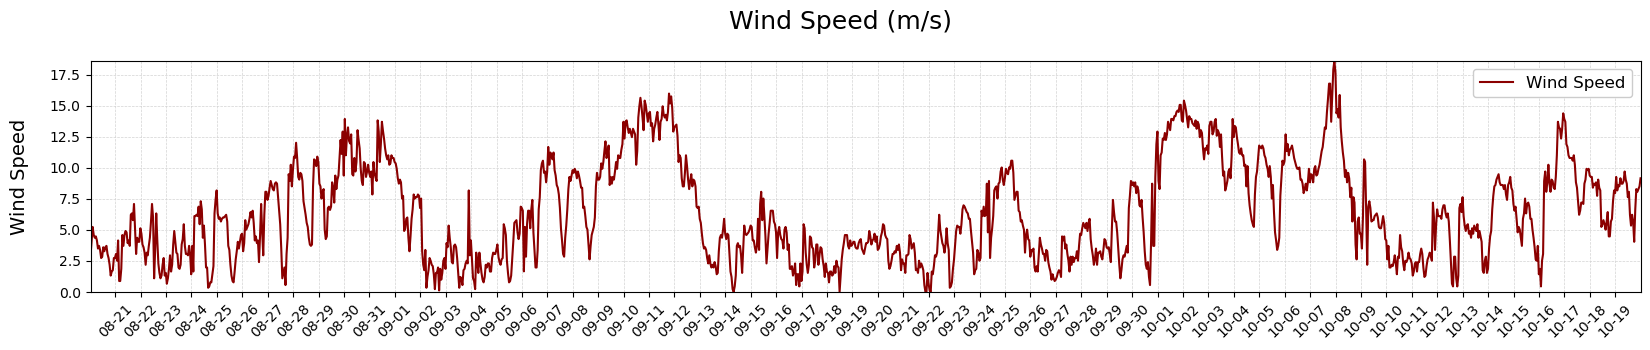

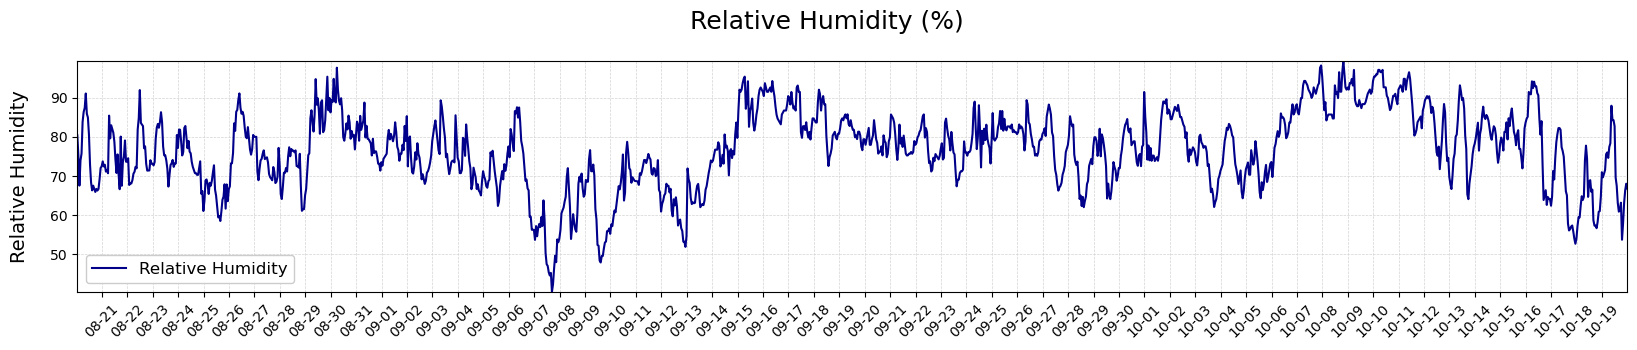

In [36]:
#Make a timeseries plot of wind speed (Vm)
single_plot(Time,df['Vm'],'Wind Speed (m/s)', 'Time', 'Wind Speed', 'darkred')
#Make a timeseries plot of relative humidity (RH)
single_plot(Time,df['RH'],'Relative Humidity (%)', 'Time', 'Relative Humidity', 'darkblue')

### Discussion Questions
1. What is happening with wind speed and relative humidity during the periods of highest negative heat flux values?
2. Is this consistent with the bulk formula for Surface Heat Fluxes? Why or why not?

In [37]:
#### 1. What is happening with wind speed and relative humidity during the periods of highest negative heat flux values?

#### 2. Is this consistent with the bulk formula for Surface Heat Fluxes? Why or why not?


### Compare this to the bulk formula for Sensible Heat Flux

Recall the bulk formula for Latent Heat Flux:
<center>$Q_e = \rho_a L_E C_L U_{10}(q_a-q_s)$ </center>

Compare this with the bulk formula for the Sensible Heat Flux:
<center>$Q_h = \rho_a c_p C_S U_{10}(T_a-T_s)$ </center>

where 

- $\rho_a$ = density of air $\approx$ 1.2 kg/m3
- $c_p$ = specific heat of air $\approx$ 1 J/g°K
- $C_S$ = bulk transfer coefficient, also called the Dalton number
- $U_{10}$ = wind speed at 10m
- $T_s$ = water temperature
- $T_a$ = air temperature


### Discussion Questions
3. Compare the bulk formulas for latent and sensible heat: which terms are different and which are the same?
4. What conditions might produce large negative sensible heat flux values?

In [38]:
#### 3. What is different and what is the same?

#### 4. What conditions might produce large negative sensible heat flux values?


**Plot the sensible heat flux and difference in the air and water temperature data**

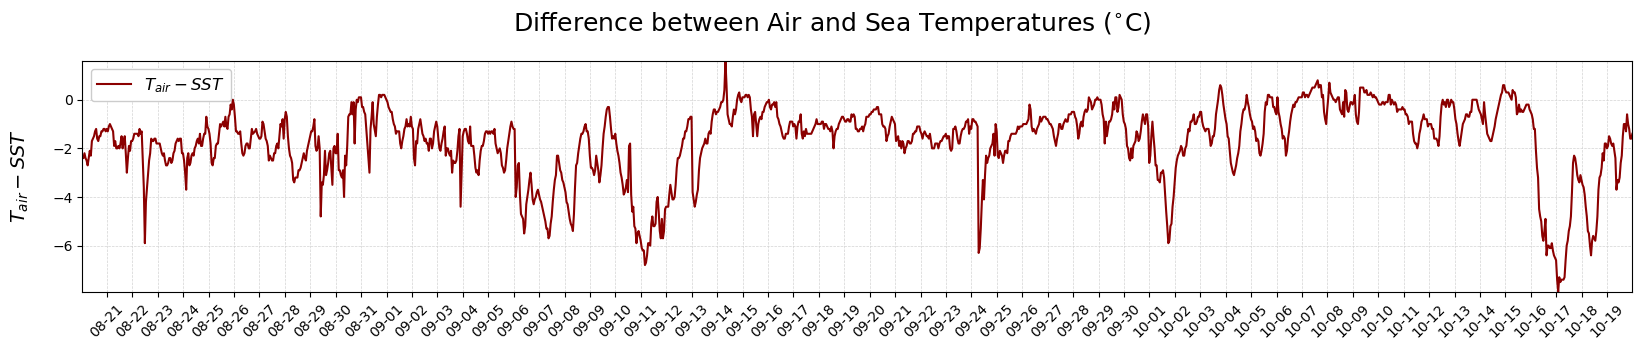

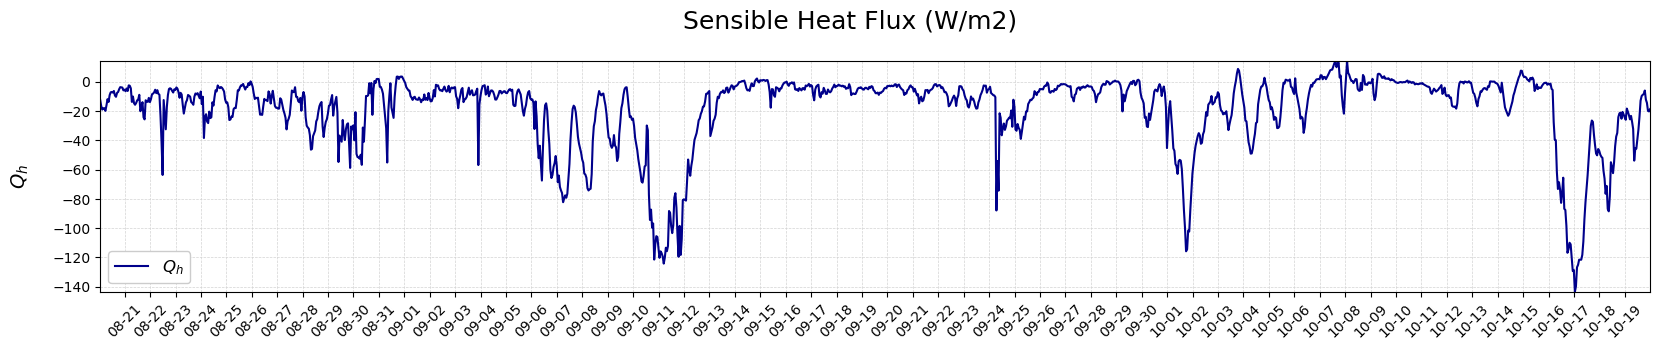

In [39]:
#Create a variable with the difference between Air and Sea Temperatures
diffairwater = df['Ta'] - df['sst']
#Make a timeseries plot of wind speed (Vm)
single_plot(Time,diffairwater,'Difference between Air and Sea Temperatures ($^{\circ}$C)', 'Time', '$T_{air} - SST$', 'darkred')
#Make a timeseries plot of relative humidity (RH)
single_plot(Time,df['Qh'],'Sensible Heat Flux (W/m2)', 'Time', '$Q_h$', 'darkblue')

### Discussion Questions
5. Notice that there are some cases where $Q_h$ is positive, e.g., 10/7.  What do you think might be going on here?  (Hint: Look at the air-water temperature difference)
6. Now, consider the fall time period during which these data were collected. How might this time series of $Q_h$ be different if the data were collected in the spring season? 

In [40]:
#### 5. Notice that there are some cases where the Qh is positive, e.g., 10/7.  What do you think might be going on here?  (Hint: Look at the air-water temperature difference)

#### 6. Now, consider the fall time period during which these data were collected.   How might this time series of Qh be different if the data were collected in the spring season? 

## Plot Summary

A function with a summary of plots is below.

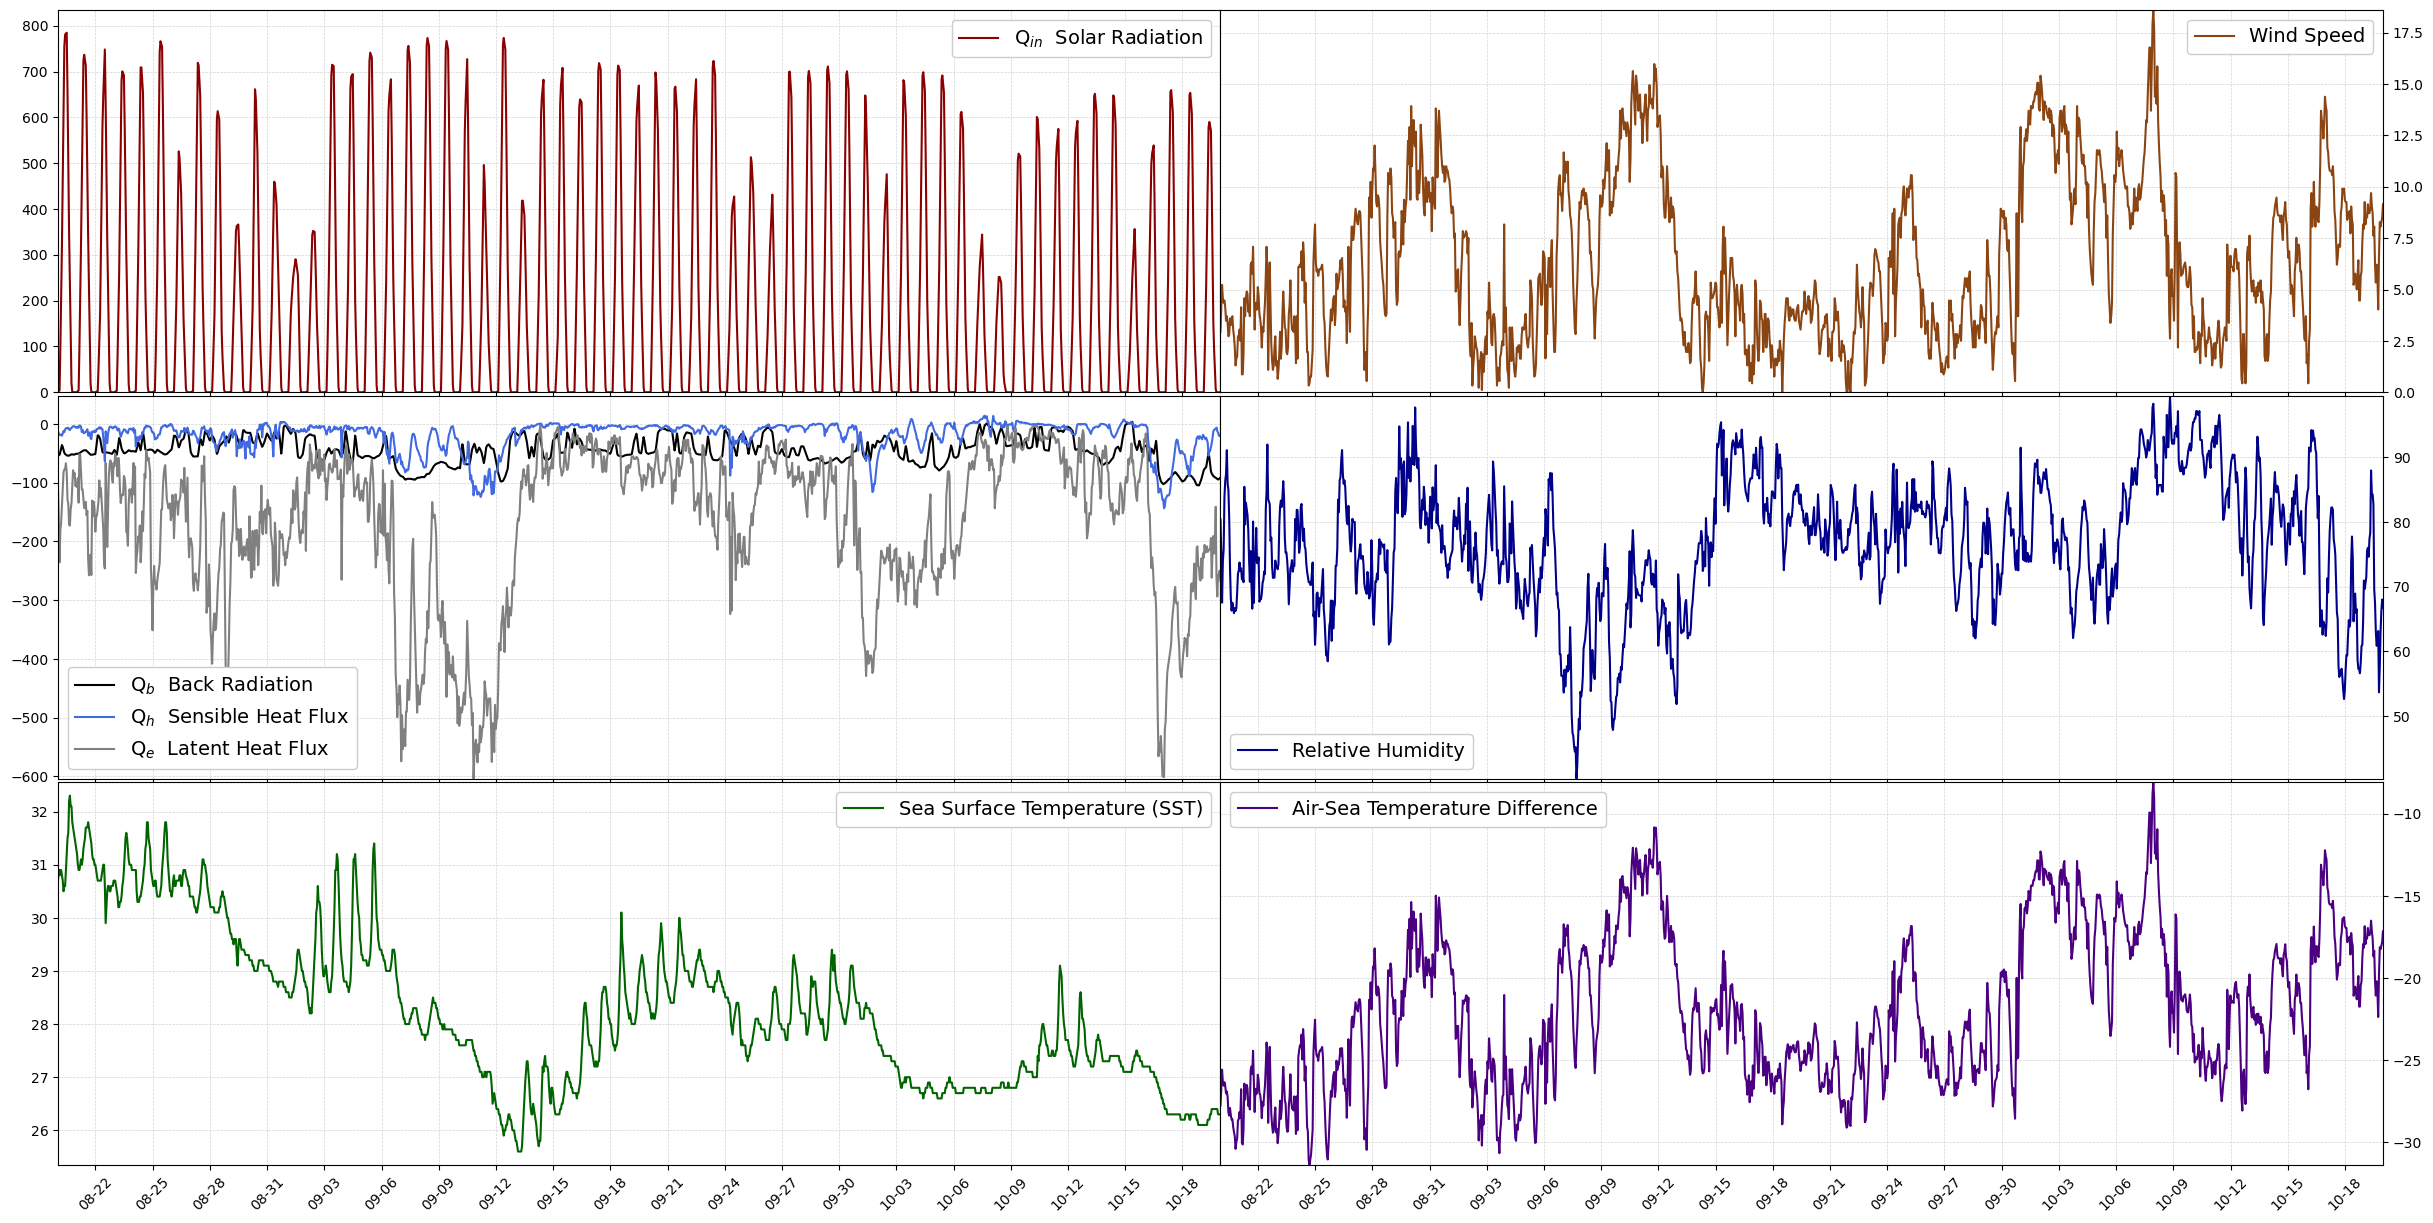

In [41]:
#Plots Qs, sst, Vm, RH, and Ta-SST
plotsummary(Time,df)

---
## Summary

In this lab, we have learned how to:
- Interpret relationships between oceanic and atmospheric data
- Plot sea surface temperature and heat fluxes
- Assess the importance of the surface heat fluxes in an ocean temperature budget
- Understand the impact of different environmental conditions in bulk heat flux formulas

---
## References
Write some
- references
- and 
- such

---
# The following contains all the code for the functions

Below are all of the functions defined in heatfluxlab.py.  You can try modifying the functions here, and if you run the cell with the modified function, it will change that function definition for the session.  If you break something, go to the beginning and to the 'import' step again

---
## Importing the Python libraries

In [42]:
#Alias Pandas as pd, for manipulating tables and timeseries
import pandas as pd
#Alias MatPlotLib at plt, for making plots/graphs/figures
import matplotlib.pyplot as plt
#Alias Numpy as'np', for the arrays
import numpy as np

---
## Reading a data file

In [43]:
# Function to read a CSV file with Pandas
def readfile (fname):
    data = pd.read_csv(fname, sep=',', engine='python') 
    return data

---
## Checking the data file
Uses 'head', which checks the first lines of the data file

In [44]:
def checkdata (data):
    return data.head()

---
## Rename columns in a Dataframe

In [45]:
def renamecols(df,names):
    df.columns=names

---
## Convert time elements to time stamp
Creates a DateTime object

In [16]:
#Create timestamp
def maketimestamp(df,timevars):
        return pd.to_datetime(df[timevars])

---
## Check the time range

In [17]:
#Check what time period is covered in the dataset.
def checktimerange(Time):
    return (Time.max() - Time.min())

---
## Calculate the change in temperature

In [18]:
#Calculate change in temperature given time, heat flux, depth, specific heat capacity, and density
def tempchange (Time, Q, z, c, rho):
    timerange = Time.max() - Time.min()
    tsec = timerange.total_seconds()
    Qave = Q.mean()
    strz = str(z)
    stround = str(round((Qave*tsec)/(c*rho*z),2))
    message = "The expected change in temperature for the given heat flux for a water column depth of " + strz + "m is "  + stround + " degrees C"
    return print(message)

---
## Make a plot of a single variable

In [19]:
#Plot a single variable
def single_plot (xvar, yvar, title, xlabel, ylabel, color):
    #Daily ticks in month-date format for year 2017
    from matplotlib.dates import DayLocator
    from matplotlib.dates import DateFormatter
    date_form = DateFormatter("%m-%d")
    dloc = DayLocator()

    #Make a timeseries plot
    fig1, (ax1) = plt.subplots(1, figsize=(20,3)) #form two rows and one column (2,1) of subplots
    fig1.suptitle(title, fontsize=18, y=1.05)

    #First plot, solar radiation
    ax1.plot(xvar, yvar, color) #main plot
    ax1.axes.get_xaxis().set_ticks([]) #remove dates
    ax1.set_xlim([xvar.min(), xvar.max()]) #x-limits
    ax1.set_ylim([yvar.min(),yvar.max()])   #y-limits
    ax1.legend([ylabel],framealpha=1, fontsize=12)
    ax1.set_ylabel(ylabel,fontsize=14)
    ax1.xaxis.set_major_locator(dloc)
    ax1.grid(color='lightgrey', linestyle='--', linewidth=0.5) #gridlines
    ax1.yaxis.labelpad = 15
    plt.xticks(rotation = 45) 
    ax1.xaxis.labelpad = 20
    
    ax1.xaxis.set_major_formatter(date_form)
    
    plt.show()

---
## Create plots for every variable in a Dataframe

In [20]:
#Plot all variables in a dataframe
def multi_plot (xvar, yvar,xlabel,ylabel):
#, title, xlabel, ylabel, colors):
    #Make a timeseries plot
    fig1, (ax1) = plt.subplots(1, figsize=(20, 3)) #form two rows and one column (2,1) of subplots
    #Choose which colors will be used automatically for plots
    #First plot, solar radiation
    ax1.plot(xvar, yvar) #main plot
    ax1.set_xlim([Time.min(), Time.max()]) #x-limits
    ax1.set_xlabel(xlabel, fontsize=14)
    ax1.set_ylabel(ylabel, fontsize=14)
    plt.show()

---
## Create the heat flux plot
The plot is specific to heat fluxes and SST

In [21]:
#Plot solar radiation, heat flux loss terms, and sea surface temperature
def plotfluxtemp (Time, df, where, when):
    
    #Define Title String
    titlestring = "Data was gathered near " + where + " during " + when +"."
    
    #Define SST and Qin
    sst = df['sst']
    Qin = df['Qin']
    #Define data frame called heatloss containing the last three columns of the data file.
    vars = ['Qb','Qh','Qe']
    heatloss = df[vars]

    #Daily ticks in month-date format for year 2019
    from matplotlib.dates import DayLocator
    from matplotlib.dates import DateFormatter
    date_form = DateFormatter("%m-%d")
    dloc = DayLocator()

    #Choose which colors will be used automatically for plots
    from cycler import cycler
    plt.rc('axes', prop_cycle=(cycler('color', ['black', 'blue', 'grey'])))

    #Make a timeseries plot with heat gain and heat loss terms
    fig1, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(18, 8)) #form two rows and one column (2,1) of subplots
    fig1.suptitle('\n Magnitude of Heat Flux Terms (W/m$^2$) and Sea Surface Temperature ($^{\circ}$C)', fontsize=18)

    #First plot, solar radiation
    ax1.plot(Time, Qin,'darkred') #main plot
    ax1.axes.get_xaxis().set_ticks([]) #remove dates
    ax1.set_xlim([Time.min(), Time.max()]) #x-limits
    ax1.set_ylim([Qin.min(),Qin.max()+50])   #y-limits
    ax1.legend(['Q$_{in}$  Solar Radiation'],framealpha=1, fontsize=12)
    ax1.set_xticklabels('')
    ax1.minorticks_off()
    ax1.set_ylabel('Heat Gain',fontsize=14)
    ax1.xaxis.set_major_locator(dloc)
    ax1.grid(color='lightgrey', linestyle='--', linewidth=0.5) #gridlines
    ax1.yaxis.labelpad = 15

    #Plot all of the heat loss terms
    ax2.plot(Time, heatloss) #main plot
    ax2.grid(color='lightgrey', linestyle='--', linewidth=0.5)#gridlines
    ax2.set_xlim([Time.min(), Time.max()]) #x-limits
    ax2.set_ylim([heatloss['Qe'].min(),heatloss['Qe'].max()+50]) #y-limits
    ax2.xaxis.set_major_locator(dloc)
    ax2.axes.get_xaxis().set_ticks([]) #remove dates
    plt.xlabel(titlestring, fontsize=16)
    ax2.xaxis.labelpad = 20
    ax2.legend(['Q$_b$  Back Radiation','Q$_h$  Sensible Heat Flux','Q$_e$  Latent Heat Flux'],framealpha=1, fontsize=12)
    ax2.set_xticklabels('')
    ax2.minorticks_off()
    ax2.set_ylabel('Heat Loss', fontsize=14)
    ax2.axes.get_xaxis().set_ticks([]) #remove dates
    ax2.xaxis.set_major_locator(dloc)

    ax2.yaxis.labelpad = 15
    plt.subplots_adjust(hspace=0.01)

    #Third plot, Temperature
    ax3.plot(Time, sst,'darkblue') #main plot
    ax3.axes.get_xaxis().set_ticks([]) #remove dates
    ax3.set_xlim([Time.min(), Time.max()]) #x-limits
    ax3.set_ylim([sst.min()-.25,sst.max()+.25])   #y-limits
    ax3.legend(['SST  Sea Surface Temperature'],framealpha=1, fontsize=12)
    ax3.set_xticklabels('')
    ax3.minorticks_off()
    ax3.set_ylabel('Temperature',fontsize=14)
    ax3.xaxis.set_major_locator(dloc)
    ax3.grid(color='lightgrey', linestyle='--', linewidth=0.5) #gridlines
    ax3.yaxis.labelpad = 20
    ax3.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation = 45) 
    ax3.xaxis.labelpad = 20

    plt.show()

---
## Create the plot summary
Six plots

In [22]:
#Plot solar radiation, heat flux loss terms, sea surface temperature
#     wind speed, relative humidity, and the difference in air and sea surface temperatures
def plotsummary (Time, df):
        
    #Define SST and Qin
    sst = df['sst']
    Qin = df['Qin']
    #Define data frame called heatloss containing the last three columns of the data file.
    vars = ['Qb','Qh','Qe']
    heatloss = df[vars]

    #Ticks in month-date format
    from matplotlib.dates import DayLocator
    from matplotlib.dates import DateFormatter
    date_form = DateFormatter("%m-%d")
    dloc = DayLocator(interval=3)

    #Choose which colors will be used automatically for plots
    from cycler import cycler
    plt.rc('axes', prop_cycle=(cycler('color', ['black', 'royalblue', 'grey'])))

    #Make a timeseries plot with heat gain and heat loss terms
    #, figsize=(18, 8)
    fig1, axes = plt.subplots(3,2,figsize=(30, 15)) #form three rows and two columns (3,2) of subplots
 
    ax1=axes[0,0]
    #First plot, solar radiation
    ax1.plot(Time, Qin,'darkred') #main plot
    ax1.axes.get_xaxis().set_ticks([]) #remove dates
    ax1.set_xlim([Time.min(), Time.max()]) #x-limits
    ax1.set_ylim([Qin.min(),Qin.max()+50])   #y-limits
    ax1.legend(['Q$_{in}$  Solar Radiation'],framealpha=1, fontsize=14)
    ax1.set_xticklabels('')
    ax1.minorticks_off()
    #ax1.set_ylabel('Heat Gain',fontsize=14)
    ax1.xaxis.set_major_locator(dloc)
    ax1.grid(color='lightgrey', linestyle='--', linewidth=0.5) #gridlines
    

    ax2=axes[1,0]
    #Plot all of the heat loss terms
    ax2.plot(Time, heatloss) #main plot
    ax2.grid(color='lightgrey', linestyle='--', linewidth=0.5)#gridlines
    ax2.set_xlim([Time.min(), Time.max()]) #x-limits
    ax2.set_ylim([heatloss['Qe'].min(),heatloss['Qe'].max()+50]) #y-limits
    ax2.xaxis.set_major_locator(dloc)
    ax2.axes.get_xaxis().set_ticks([]) #remove dates
    ax2.legend(['Q$_b$  Back Radiation','Q$_h$  Sensible Heat Flux','Q$_e$  Latent Heat Flux'],framealpha=1, fontsize=14)
    ax2.set_xticklabels('')
    ax2.minorticks_off()
    #ax2.set_ylabel('Heat Loss', fontsize=14)
    ax2.axes.get_xaxis().set_ticks([]) #remove dates
    ax2.xaxis.set_major_locator(dloc)
    plt.subplots_adjust(hspace=0.01,wspace=0)

    ax3=axes[2,0]
    #Third plot, Temperature
    ax3.plot(Time, sst,'darkgreen') #main plot
    ax3.axes.get_xaxis().set_ticks([]) #remove dates
    ax3.set_xlim([Time.min(), Time.max()]) #x-limits
    ax3.set_ylim([sst.min()-.25,sst.max()+.25])   #y-limits
    ax3.legend(['Sea Surface Temperature (SST)'],framealpha=1, fontsize=14)
    ax3.set_xticklabels('',rotation=45)
    ax3.minorticks_off()
    #ax3.set_ylabel('Sea Surface Temperature',fontsize=14)
    ax3.xaxis.set_major_locator(dloc)
    ax3.grid(color='lightgrey', linestyle='--', linewidth=0.5) #gridlines
    ax3.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation = 45) 
    ax3.tick_params(axis='x',labelrotation=45)
    
    
    ax4=axes[0,1]
    #Fourth plot, Wind Speed
    ax4.plot(Time, df['Vm'],'saddlebrown') #main plot
    ax4.axes.get_xaxis().set_ticks([]) #remove dates
    ax4.set_xlim([Time.min(), Time.max()]) #x-limits
    ax4.set_ylim([df['Vm'].min(),df['Vm'].max()])   #y-limits
    ax4.legend(['Wind Speed'],framealpha=1, fontsize=14)
    ax4.set_xticklabels('')
    ax4.minorticks_off()
    #ax4.set_ylabel('Wind Speed',fontsize=14)
    ax4.xaxis.set_major_locator(dloc)
    ax4.grid(color='lightgrey', linestyle='--', linewidth=0.5) #gridlines
    ax4.yaxis.set_label_position("right")
    ax4.yaxis.tick_right()

    ax5=axes[1,1]
    #Fifth plot, Relative Humidity
    ax5.plot(Time, df['RH'],'darkblue') #main plot
    ax5.grid(color='lightgrey', linestyle='--', linewidth=0.5)#gridlines
    ax5.set_xlim([Time.min(), Time.max()]) #x-limits
    ax5.set_ylim(df['RH'].min(),df['RH'].max()) #y-limits
    ax5.xaxis.set_major_locator(dloc)
    ax5.axes.get_xaxis().set_ticks([]) #remove dates
    ax5.legend(['Relative Humidity'],framealpha=1, fontsize=14)
    ax5.set_xticklabels('')
    ax5.minorticks_off()
    #ax5.set_ylabel('Relative Humidity', fontsize=14)
    ax5.axes.get_xaxis().set_ticks([]) #remove dates
    ax5.xaxis.set_major_locator(dloc)
    plt.subplots_adjust(hspace=0.01)
    ax5.yaxis.set_label_position("right")
    ax5.yaxis.tick_right()

    ax6=axes[2,1]
    #Sixth plot, Difference in Air and Water temperature
    diffairtemp = df['Vm']-df['sst']
    ax6.plot(Time, diffairtemp,'indigo') #main plot
    ax6.axes.get_xaxis().set_ticks([]) #remove dates
    ax6.set_xlim([Time.min(), Time.max()]) #x-limits
    ax6.set_ylim([diffairtemp.min(),diffairtemp.max()])   #y-limits
    ax6.legend(['Air-Sea Temperature Difference'],framealpha=1, fontsize=14)
    ax6.set_xticklabels('')
    ax6.minorticks_off()
    #ax6.set_ylabel('Air-Water Temperature$',fontsize=14)
    ax6.xaxis.set_major_locator(dloc)
    ax6.grid(color='lightgrey', linestyle='--', linewidth=0.5) #gridlines
    ax6.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation = 45) 
    ax6.yaxis.set_label_position("right")
    ax6.yaxis.tick_right()
       
    plt.show()